In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv


In [26]:
df = pd.read_csv("/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [27]:
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


<Axes: >

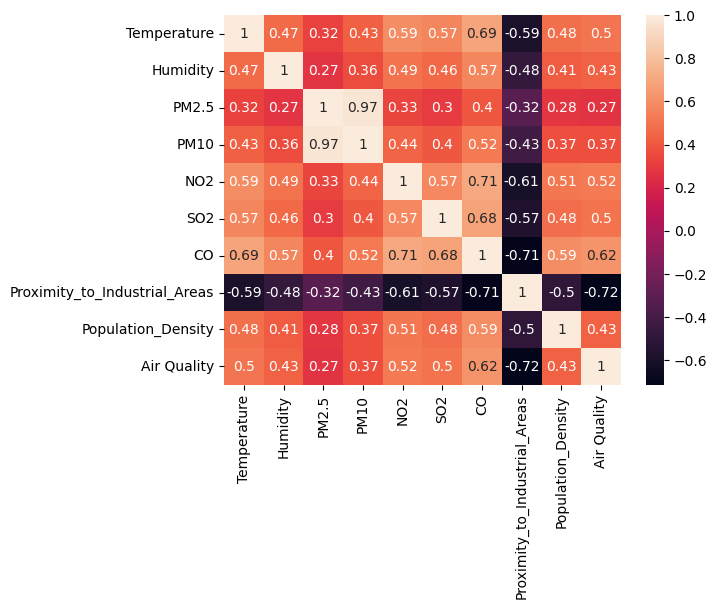

In [28]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, annot = True)

In [29]:
x = df.drop('Air Quality', axis = 1)
y = df['Air Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty' : ['l1', 'l2'], 'solver': ['liblinear']}
log_reg = LogisticRegression()

logreg_cv = GridSearchCV(log_reg, param_grid, cv = 5, scoring= 'accuracy')    
logreg_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [32]:
print("Logistic Regresison With GridSearchCV")

print("\nTuned Hyperparameter : {}".format(logreg_cv.best_params_))
print("Best Accuracy : {}".format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(x_test_scaled)

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Imbalanced Data Spotted on 'Poor'")

Logistic Regresison With GridSearchCV

Tuned Hyperparameter : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy : 0.8774285714285714

Classification Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.87      0.81      0.84       148
    Moderate       0.81      0.94      0.87       452
        Poor       0.78      0.59      0.67       282

    accuracy                           0.89      1500
   macro avg       0.86      0.84      0.84      1500
weighted avg       0.89      0.89      0.88      1500

Imbalanced Data Spotted on 'Poor'


In [33]:
param_grid = {'n_estimators': [50, 100, 200], 
              'max_features' : ['auto', 'sqrt'], 
              'max_depth': [None, 10, 20]
             }
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid, cv = 5, scoring= "accuracy")    
rf_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [35]:
print("Random Forest Classifier With GridSearchCV")

print("\nTuned Hyperparameter : {}".format(rf_cv.best_params_))
print("Best Accuracy : {}".format(rf_cv.best_score_))

y_pred = rf_cv.predict(x_test_scaled)

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Random Forest More Robust To Imbalanced Data")

Random Forest Classifier With GridSearchCV

Tuned Hyperparameter : {'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
Best Accuracy : 0.958

Classification Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.90      0.84      0.87       148
    Moderate       0.96      0.96      0.96       452
        Poor       0.86      0.89      0.87       282

    accuracy                           0.95      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500

Random Forest More Robust To Imbalanced Data
